In [2]:
import os
import sys
import random
import math
import cv2
import imutils
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline 

# Root directory of the project
ROOT_DIR = os.path.abspath("/../../")

# Import Mask RCNN
sys.path.append(ROOT_DIR)
from mrcnn import utils
from mrcnn import visualize
from mrcnn.visualize import display_images
import mrcnn.model as modellib
from mrcnn.model import log

import WBC

In [2]:
# Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, "logs")

# Path to WBC trained weights
WEIGHTS_PATH = "/path/to/trained/weights.h5"

In [3]:
config = WBC.WBCConfig()
WBC_DIR = os.path.join(ROOT_DIR, 'WBC')

In [4]:
# Load Dataset
dataset = WBC.WBCDataset()
dataset.load_dataset(WBC_DIR, "train")

# Must call before using the dataset
dataset.prepare()

print("Image Count: {}".format(len(dataset.image_ids)))
print("Class Count: {}".format(dataset.num_classes))
for i, info in enumerate(dataset.class_info):
    print("{:3}. {:50}".format(i, info['name']))

Image Count: 238
Class Count: 6
  0. BG                                                
  1. Basophil                                          
  2. Eosinophil                                        
  3. Lymphocyte                                        
  4. Monocyte                                          
  5. Neutrophil                                        


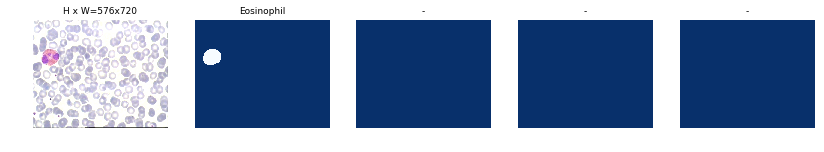

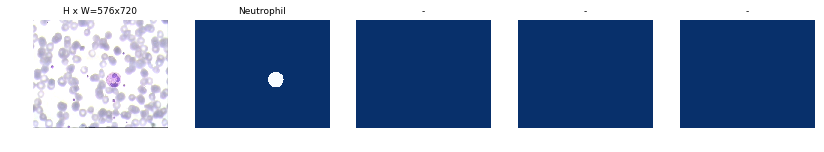

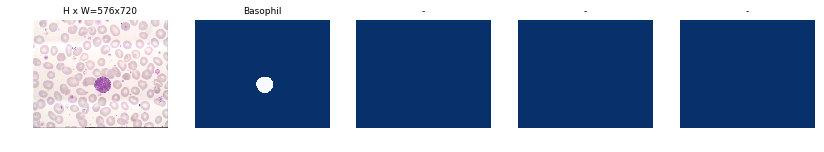

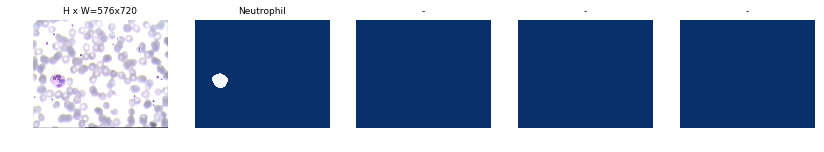

In [5]:
# Load and display random samples
image_ids = np.random.choice(dataset.image_ids, 4)
for image_id in image_ids:
    image = dataset.load_image(image_id)
    mask, class_ids = dataset.load_mask(image_id)
    visualize.display_top_masks(image, mask, class_ids, dataset.class_names)

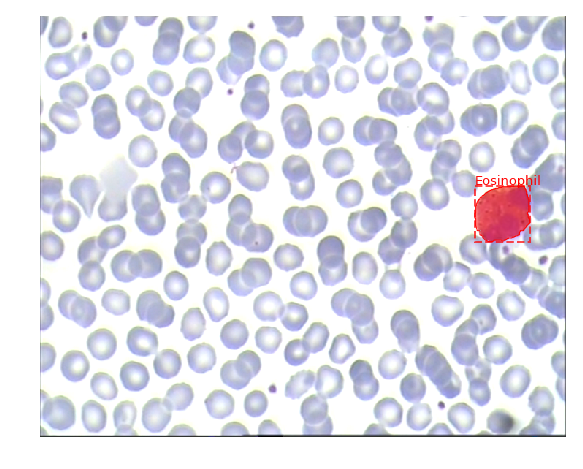

In [7]:
# Load random image and mask.
image_id = random.choice(dataset.image_ids)
image = dataset.load_image(image_id)
mask, class_ids = dataset.load_mask(image_id)

# Compute Bounding box
bbox = utils.extract_bboxes(mask)

# Display image and instances
visualize.display_instances(image, bbox, mask, class_ids, dataset.class_names, figsize=(10,8))

In [8]:
# Override the training configurations with a few
# changes for inferencing.
class InferenceConfig(config.__class__):
    # Run detection on one image at a time
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

config = InferenceConfig()
config.display()


Configurations:
BACKBONE                       resnet50
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.8
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  768
IMAGE_META_SIZE                18
IMAGE_MIN_DIM                  768
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [768 768   3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE              

In [9]:
# Load test/detect dataset to perform detection on new images
dataset = WBC.WBCDataset()
dataset.load_dataset(WBC_DIR, "detect")

# Must call before using the dataset
dataset.prepare()

In [10]:
# Create model in inference mode and load trained weights
model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR, config=config)
model.load_weights(WEIGHTS_PATH, by_name=True)

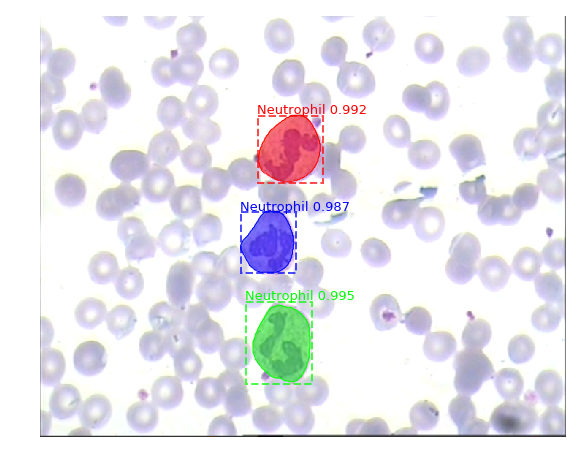

In [11]:
# Load random image
image_id = random.choice(dataset.image_ids)
image = dataset.load_image(image_id)

# Run object detection
r = model.detect([image], verbose=0)[0]

# Display results
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                            dataset.class_names, r['scores'], figsize=(10,8))

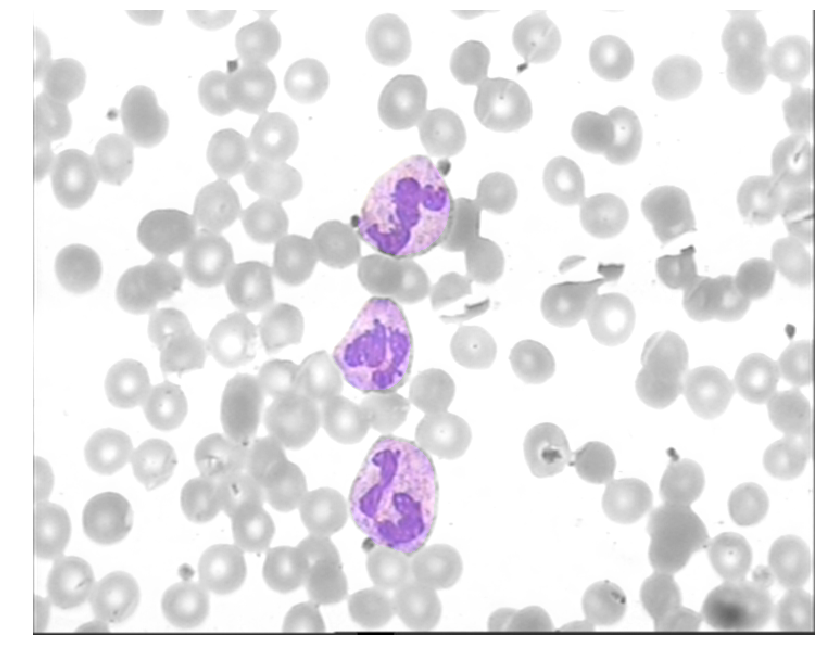

In [12]:
splash = WBC.color_splash(image, r['masks'])
display_images([splash], cols=1)